<a href="https://colab.research.google.com/github/frankjinn/TensorFlowProjects/blob/main/02_Classification_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### Types of Classification Problems

 * Binary classification
 * Multiclass classification
 * Multilabel classification

###Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
#Check out features: We see that it is binary classification
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
X[:2, 1] #This notation first selects the first axis, then the second axis

array([0.23148074, 0.15325888])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


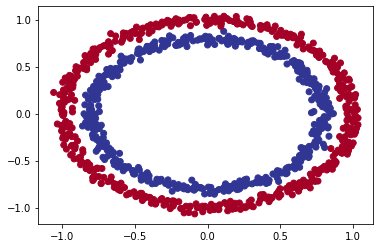

In [ ]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
##Input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

###Steps in modelling

In [ ]:
#Split into test and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_test), len(y_test)

(200, 200)

In [ ]:
X_train

array([[-0.52639238,  0.59107051],
       [-1.00365275,  0.03451356],
       [-0.76776908, -0.15786065],
       ...,
       [ 1.00483604, -0.05878481],
       [-0.90550961,  0.4988384 ],
       [-0.16932234, -0.79345575]])

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

#1. Create the model
binary_model = tf.keras.Sequential([
     tf.keras.layers.Dense(4, activation = 'relu', input_shape = [2]),
     tf.keras.layers.Dense(4, activation = 'relu'),
     tf.keras.layers.Dense(1, activation = 'sigmoid')                            
])

#2. Compile the model
binary_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.027),
                     metrics = "accuracy")

#3. Fit the model
history = binary_model.fit(X_train, y_train, epochs = 25, verbose = 0)


In [ ]:
#Evaluate
binary_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9900


[0.025003474205732346, 0.9900000095367432]

In [ ]:
#Predict
round(binary_model.predict([[0.,  0]])[0][0])
#Model does not return 1 or 0, but rather chooses the closest one

1

Text(0.5, 0, 'epochs')

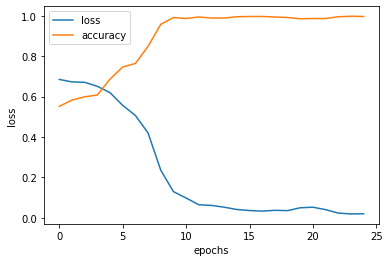

In [ ]:
#Visualizing results
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
#We could optimize it by using only 20 epochs

In [ ]:
#Just for fun, run the same thing with other activation functions
tf.random.set_seed(42)

binary_model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation = "relu", input_shape = [2]),
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(1, activation = tf.keras.activations.tanh)  #Doesnt work because tanh range is -1 to 1, so blue would have to be -1 and not 0                            
])

binary_model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = "accuracy")

history = binary_model_1.fit(X_train, y_train, epochs = 50, verbose = 0)

In [ ]:
#History stores the metrics and loss
pd.DataFrame(history.history)

,loss,accuracy
0,7.751036,0.4975
1,7.751036,0.4975
2,7.751036,0.4975
3,7.751036,0.4975
4,7.751036,0.4975
5,7.751038,0.4975
6,7.751036,0.4975
7,7.751036,0.4975
8,7.751037,0.4975
9,7.751036,0.4975


Text(0.5, 0, 'epochs')

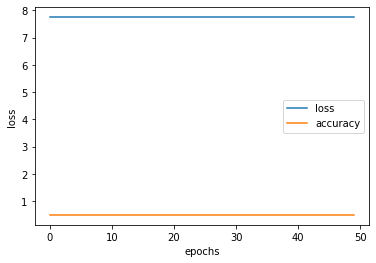

In [ ]:
#Visualizing result
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#Visualizing predictions
* Take in a trained model, features (X) and labels (y)
* Create meshgrid of all the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """

  #Define the asix boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  #Check this website stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
  #Basically gives all of the X values and Y values in a 100x100 grid, therefore xx and yy 
  #are both shaped (100,100)
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  #Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2-D arrays
  
  #Make predictions
  y_pred = model.predict(x_in)

  #Check for multi-class
  #Take largest (aka highest correlated) decision and then reshape all the answers into a 100 by 100 grid
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

  #Round the value and reshape like above
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[: ,1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


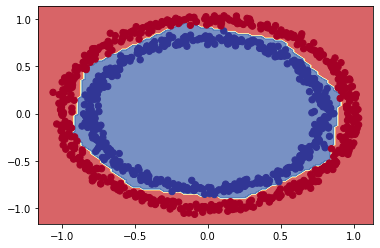

In [ ]:
#Check out the predictions our model is making
plot_decision_boundary(model = binary_model, X=X, y=y)
#Fewer neurons means less smooth line

doing binary classification
doing binary classification


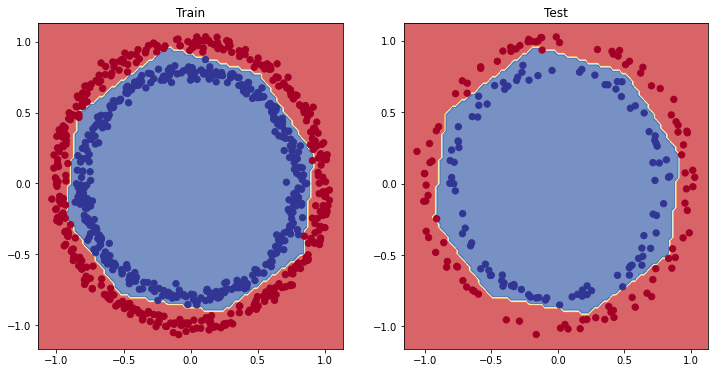

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(binary_model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(binary_model, X=X_test, y=y_test)
plt.show()

###Non-linearity
https://docs.google.com/document/d/15bctDI2qZxsezaSwHKzBUNy5sLIzhAZ9CcXqD15i2C4/edit#


###Finding ideal learning rate
To find the ideal learning rate (the learning rate where the loss decresases the most during training) we're going to use the following steps:

* A learning rate callback: a function that happens **during** training. Changes learning rate during training

* Another model (we could used the same one as above, but we're practicing building models here)

* A modified loss curve plot

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create a model (same as model_8)
model_9 = tf.keras.Sequential([
     tf.keras.layers.Dense(4, activation = "relu"),
     tf.keras.layers.Dense(4, activation = "relu"),
     tf.keras.layers.Dense(1, activation = "sigmoid")                          
])

model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])
#Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
#starts at 1e-4, then increases exponentially

#Fit model
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

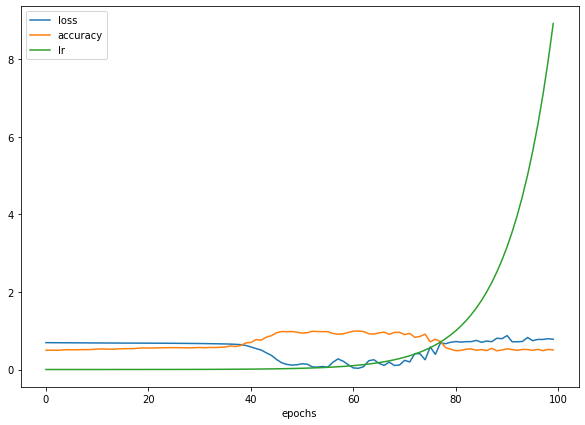

In [ ]:
pd.DataFrame(history_9.history).plot(figsize = (10,7), xlabel = "epochs")

In [ ]:
history_9.history.keys()

dict_keys(['loss', 'accuracy', 'lr'])

Text(0.5, 1.0, 'Lr vs Loss')

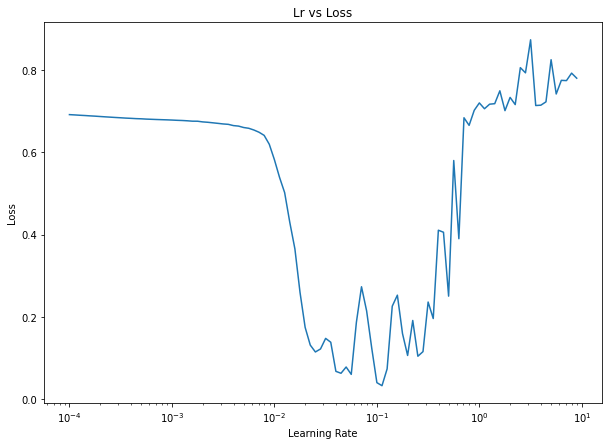

In [ ]:
#Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Lr vs Loss")

Common learning rate values to test out are 0 and negative powers of 10

###Classification Evaluation Methods
https://docs.google.com/document/d/15bctDI2qZxsezaSwHKzBUNy5sLIzhAZ9CcXqD15i2C4/edit?usp=sharing



In [ ]:
#Check the accuracy of our model
loss, accuracies = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model loss on the test set: {accuracies}")

7/7 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5100
Model loss on the test set: 0.6952770948410034
Model loss on the test set: 0.5099999904632568


###Confusion matrix

* A matrix that compares True labels with Predicted labels. And hence shows the true positives and negatives, as well as the false positives and negatives.

In [ ]:
from sklearn.metrics import confusion_matrix

#Make predictions
y_preds = binary_model.predict(X_test)

#Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [ ]:
y_test[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
y_preds[:10]

array([[9.9984926e-01],
       [1.6987830e-02],
       [6.4554811e-04],
       [9.9756742e-01],
       [9.9913198e-01],
       [9.9923992e-01],
       [8.5133314e-04],
       [8.1728399e-03],
       [3.0676514e-02],
       [7.6712582e-05]], dtype=float32)

In [ ]:
#We need to round the value, matrix can take in float, just not anything with vals after decimal
tf.round(y_preds)
#Or np.rint(y_preds)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
 

In [ ]:
#Make predictions
y_preds_ints = binary_model.predict(X_test)

#Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

#94 tn, 101 tp, 3 fp, 2 fn

array([[100,   2],
       [  0,  98]])

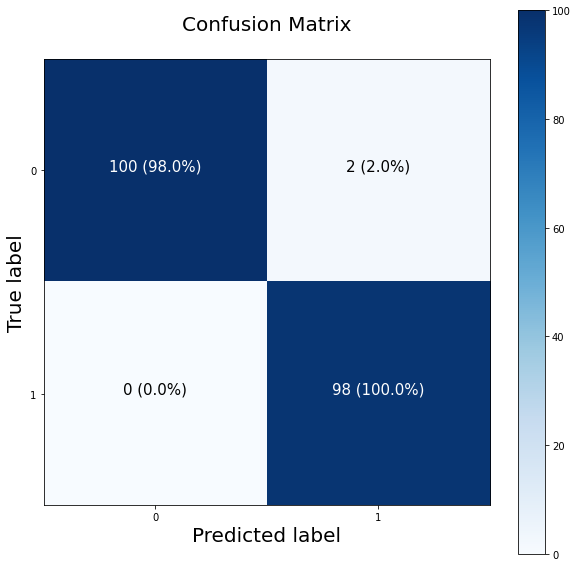

In [ ]:
import itertools
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

###Working with a larger example (multiclass classification)

When you have more than two classes as an option, its known as multiclass classification.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
#Show the first training example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

#This is an ankle boot

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
#Check the shape of a single example:
train_data.shape, train_labels[0].shape

((60000, 28, 28), ())

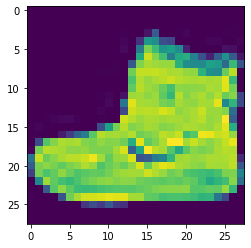

In [ ]:
#Plot a single (useful for images):
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
#index represents numerical representation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Dress')

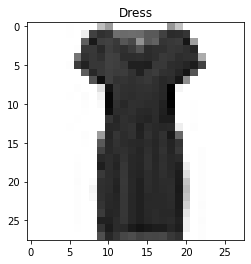

In [ ]:
#Plot an example mage and its label
index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [ ]:
train_labels.dtype

dtype('uint8')

In [ ]:
#Input shape = 28X28
#Output shape = 10 (1 per class)
import tensorflow as tf

#Create model
tf.random.set_seed(42)

#Create model
clothing_model_1 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (28,28)), #Multidimensional data must be flattened                                   
     tf.keras.layers.Dense(4, activation = "relu"),
     tf.keras.layers.Dense(4, activation = "relu"),
     tf.keras.layers.Dense(10, activation = "softmax")
])

#Compiling model
#CategoricalCrossentropy is required for labels to be one-hot encoded.
#Note: do not use tf.keras.metrics.categorical_crossentropy, this version does something different
#SparseCategoricalCrossentropy
clothing_model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["accuracy"])

#Callback function
callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10e-4 * 10 ** (epoch/10))

#Fitting model
non_norm_history = clothing_model_1.fit(train_data, train_labels, epochs = 10, verbose = 1, callbacks = [callback], validation_data=[test_data, test_labels])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1643 - accuracy: 0.1609 - val_loss: 1.8304 - val_accuracy: 0.2048 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7055 - accuracy: 0.2518 - val_loss: 1.6486 - val_accuracy: 0.2814 - lr: 0.0013
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6392 - accuracy: 0.2838 - val_loss: 1.6087 - val_accuracy: 0.2810 - lr: 0.0016
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6298 - accuracy: 0.2900 - val_loss: 1.5833 - val_accuracy: 0.3192 - lr: 0.0020
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6282 - accuracy: 0.2966 - val_loss: 1.6182 - val_accuracy: 0.2957 - lr: 0.0025
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6453 - accuracy: 0.2981 - val_loss: 1.5976 - val_accuracy: 0.3208 - lr: 0.0032
Epoch 7/10
1875/1875 [==============================] - 3s

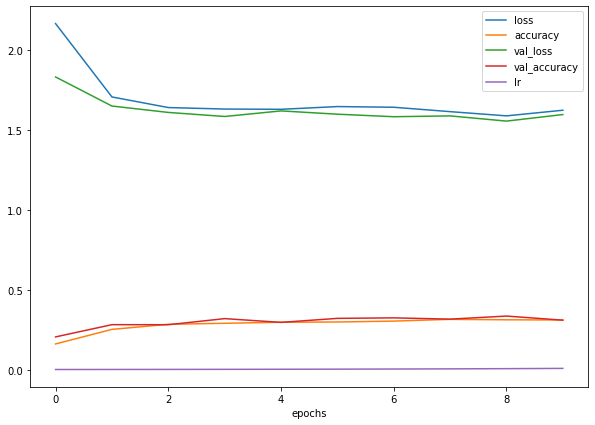

In [ ]:
pd.DataFrame(non_norm_history.history).plot(figsize = (10,7), xlabel = "epochs")

###Improving the model

In [ ]:
#First normalizing data ny dividing list by maximum
train_data.min(), train_data.max()


(0, 255)

In [ ]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#Input shape = 28X28
#Output shape = 10 (1 per class)

#Create model
tf.random.set_seed(42)

#Create model
clothing_model_2 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (28,28)), #Multidimensional data must be flattened                                   
     tf.keras.layers.Dense(4, activation = "relu"),
     tf.keras.layers.Dense(4, activation = "relu"),
     tf.keras.layers.Dense(10, activation = "softmax")
])

#Compiling model
#CategoricalCrossentropy is required for labels to be one-hot encoded.
#Note: do not use tf.keras.metrics.categorical_crossentropy, this version does something different
#SparseCategoricalCrossentropy
clothing_model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["accuracy"])

#Callback function
#callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10e-4 * 10 ** (epoch/10))

#Fitting model
norm_history = clothing_model_2.fit(train_data_norm, train_labels, epochs = 10, verbose = 1, validation_data=[test_data_norm, test_labels])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [ ]:
pd.DataFrame(norm_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.034784,0.647433,0.693734,0.7617
1,0.637599,0.775667,0.640015,0.7820
2,0.594212,0.791383,0.624713,0.7783
3,0.574958,0.797917,0.607760,0.7881
4,0.564112,0.800600,0.616884,0.7881
5,0.554436,0.804267,0.585528,0.7951
6,0.548795,0.806283,0.609658,0.7836
7,0.542830,0.807733,0.578688,0.7971
8,0.537294,0.809650,0.569831,0.7977
9,0.535991,0.812417,0.565825,0.8014


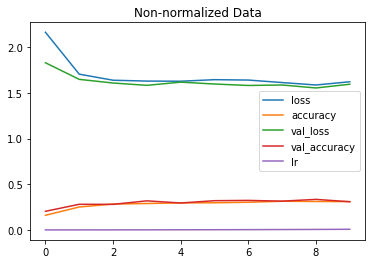

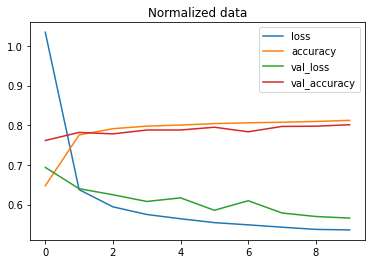

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [ ]:
#Rewriting with callback
tf.random.set_seed(42)

clothing_model_2_callback = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (28,28)),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")                                                   
])

clothing_model_2_callback.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["accuracy"])

callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10e-3 * 10 ** (epoch/20))

lr_history = clothing_model_2_callback.fit(train_data_norm, 
                                      train_labels, 
                                      epochs = 40, 
                                      validation_data = (test_data_norm, test_labels),
                                      callbacks = [callback])


Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0987 - accuracy: 0.5718 - val_loss: 0.9617 - val_accuracy: 0.6553 - lr: 0.0100
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8748 - accuracy: 0.6901 - val_loss: 0.8590 - val_accuracy: 0.7021 - lr: 0.0112
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8531 - accuracy: 0.6939 - val_loss: 0.8439 - val_accuracy: 0.6905 - lr: 0.0126
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8503 - accuracy: 0.6957 - val_loss: 0.8403 - val_accuracy: 0.6997 - lr: 0.0141
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8519 - accuracy: 0.6938 - val_loss: 0.9952 - val_accuracy: 0.6495 - lr: 0.0158
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8506 - accuracy: 0.6960 - val_loss: 0.8441 - val_accuracy: 0.7067 - lr: 0.0178
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding Lrs')

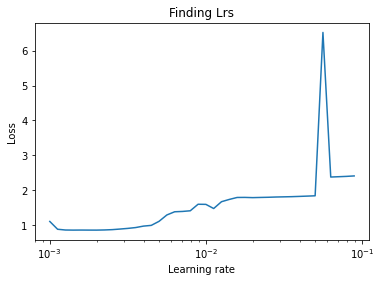

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding Lrs")

#Turns out that 10^-3 is ideal

In [ ]:
#Create confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (15,15), text_size = 15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  #Set label to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Must use the same type of data, in this case is normalized data
y_probs = clothing_model_2.predict(test_data_norm)
y_probs[:5]

array([[2.67574768e-10, 8.36206087e-15, 4.81271272e-05, 3.40114887e-08,
        1.23736856e-04, 2.73352206e-01, 3.39614616e-07, 8.82696807e-02,
        6.16733218e-03, 6.32038474e-01],
       [8.12879225e-05, 5.76163584e-15, 9.49077904e-01, 7.81002029e-07,
        8.87470320e-03, 8.59922647e-13, 4.17943113e-02, 5.20497698e-26,
        1.70955755e-04, 7.83175125e-08],
       [1.09286761e-04, 9.96481419e-01, 9.71142722e-09, 3.40284919e-03,
        2.56673434e-06, 1.08077262e-20, 3.80362508e-06, 1.49553976e-18,
        3.59249377e-08, 2.74244704e-14],
       [1.03193539e-04, 9.93369401e-01, 5.70146170e-08, 6.49508182e-03,
        2.15692580e-05, 1.15561582e-17, 1.01945925e-05, 3.01003085e-14,
        5.62862795e-07, 8.60022557e-12],
       [1.39543653e-01, 3.78135155e-06, 3.45286161e-01, 1.36686359e-02,
        3.66059318e-02, 5.40103171e-11, 4.62722272e-01, 3.91260747e-19,
        2.16952572e-03, 8.28052507e-08]], dtype=float32)

In [ ]:
y_preds = tf.argmax(y_probs, axis = 1).numpy()
y_preds.shape

(10000,)

In [ ]:
test_labels.shape

(10000,)

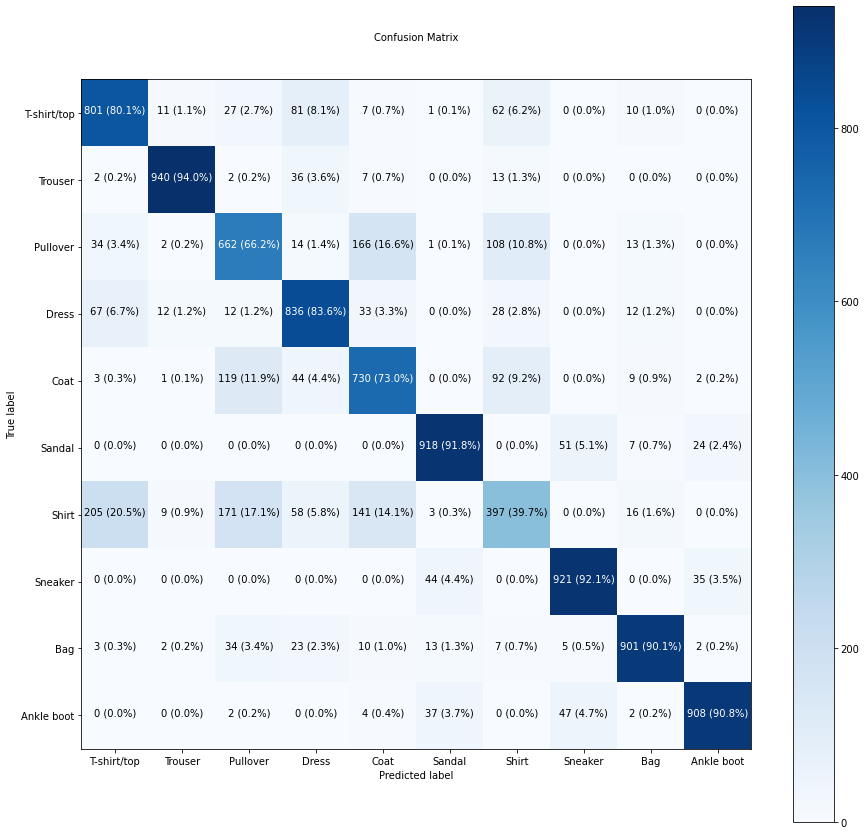

In [ ]:
make_confusion_matrix(y_true = test_labels, y_pred = y_preds, classes = class_names, text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

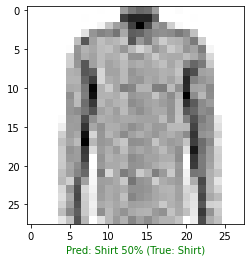

In [ ]:
plot_random_image(model = clothing_model_2,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

In [ ]:
#Find the layers of our most recent model
clothing_model_2.layers

In [ ]:
#Get the patterns of a layer our network
weights, biases = clothing_model_2.layers[1].get_weights()

weights, weights.shape

(array([[ 0.38585982, -0.01683236, -0.48614588, -0.5381739 ],
        [ 0.09176348, -0.0734309 , -0.27991357,  0.04825679],
        [ 0.4390811 ,  0.46483988, -0.6423493 , -0.44439036],
        ...,
        [-0.2540552 ,  0.537942  , -0.15410851,  0.15027717],
        [-0.23082417,  0.45492044,  0.08331501, -0.37904856],
        [ 0.15038294,  0.13788216, -0.14806953, -0.01065999]],
       dtype=float32), (784, 4))

In [ ]:
biases, biases.shape

(array([-0.07772556,  0.08738993, -0.3689595 ,  0.72360307], dtype=float32),
 (4,))

Every neuron has a bias vector. And a weight for each input. 

The bias vector get initialized as zeros (at least as a tf Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer



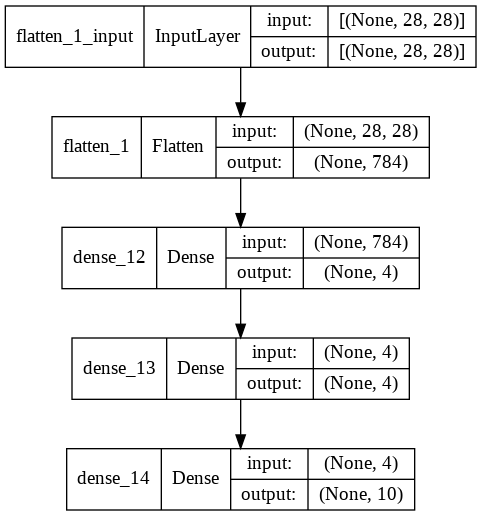

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(clothing_model_2, show_shapes = True)